# Section B

In [1]:
#importing required modules and dependencies
import numpy as np
import matplotlib.pyplot as plt

# 1) Scratch Implementation

In [3]:
def dist_fn(centroid, point): #euclidean distance
    return ((centroid[0]-point[0]) ** 2 + (centroid[1]-point[1]) ** 2) ** 0.5

def assign_clusters(X, centroids): #assignment step
    clusters =  []
    for point in X:
        dist = [dist_fn(centroid, point) for centroid in centroids]
        clusters.append(dist.index(min(dist)))
    return clusters

def update_centroids(X, clusters, k): #updation step
    new_centroids = []
    for i in range(k):
        cluster_points = [X[j] for j in range(len(X)) if i==clusters[j]]
        if cluster_points:
            new_centroid = [sum(coord) / len(cluster_points) for coord in zip(*cluster_points)]
            new_centroids.append(new_centroid)
        else: #random new centroid for empty cluster
            new_centroids.append(X[np.random.choice(X.shape[0], 1)])
    return new_centroids

def kmeans(X, k, centroids=None, iter=100, conv_thrsh=1e-4):
    #initialization
    if centroids is None:
        #random initialization
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for it in range(iter):
        clusters = assign_clusters(X, centroids) #assignment step
        new_centroids = update_centroids(X, clusters, k) #updation step

        #convergence check
        changes = [dist_fn(c1, c2) for c1, c2 in zip(centroids, new_centroids)]
        if max(changes) < conv_thrsh:
            print('reached convergence threshold, early stopping at iteration', it+1)
            break
        centroids = new_centroids
    return centroids, clusters

# 2) Performance on given centroids and data points

In [4]:
#given centroids
k=2
u = np.array([(3.0, 3.0), (2.0, 2.0)])

#matrix X
X = np.array([(5.1, 3.5), (4.9, 3.0), (5.8, 2.7), (6.0, 3.0), (6.7, 3.1), (4.5, 2.3), (6.1, 2.8), (5.2, 3.2),
     (5.5, 2.6), (5.0, 2.0), (8.0, 0.5), (7.5, 0.8), (8.1, -0.1), (2.5, 3.5), (1.0, 3.0), (4.5, -1.0), (3.0, -0.5),
     (5.1, -0.2), (6.0, -1.5), (3.5, -0.1), (4.0, 0.0), (6.1, 0.5), (5.4, -0.5), (5.3, 0.3), (5.8, 0.6)])

centroids, clusters = kmeans(X=X, k=k, centroids=u, iter=100, conv_thrsh=1e-4)
wcss=0
for i, point in enumerate(X):
     wcss += dist_fn(point, centroids[clusters[i]]) ** 2

print('Final value of centroids:', centroids)
print('WCSS with given centroids', wcss)

reached convergence threshold, early stopping at iteration 3
Final value of centroids: [[5.8, 2.125], [4.199999999999999, -0.05555555555555555]]
WCSS with given centroids 83.67222222222222


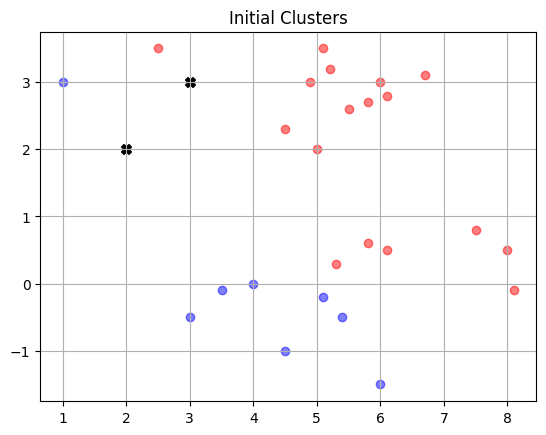

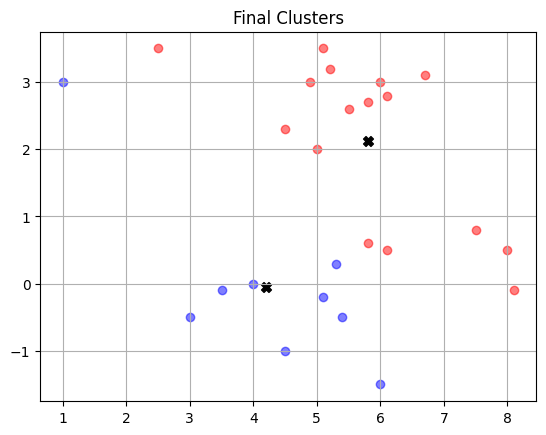

In [9]:
def plot_clusters(data, clusters, centroids, title):
    colors = ['red', 'blue', 'green', 'yellow', 'pink']
    for i, point in enumerate(data):
        plt.scatter(point[0], point[1], color=colors[clusters[i]], alpha=0.5)
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=50)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_clusters(X, assign_clusters(X, u), u, "Initial Clusters")
plot_clusters(X, clusters, centroids, "Final Clusters")

# 3) Random Initialization

reached convergence threshold, early stopping at iteration 2
WCSS with random centroids 67.15833333333335


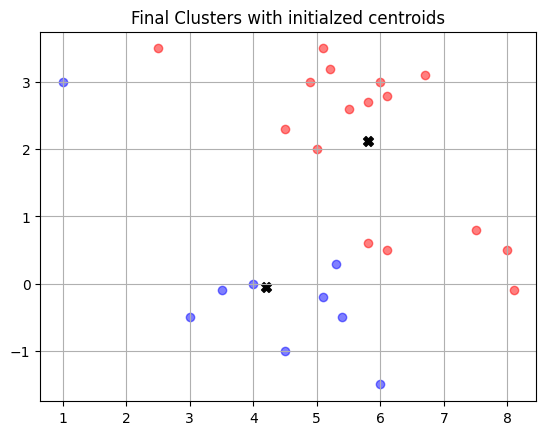

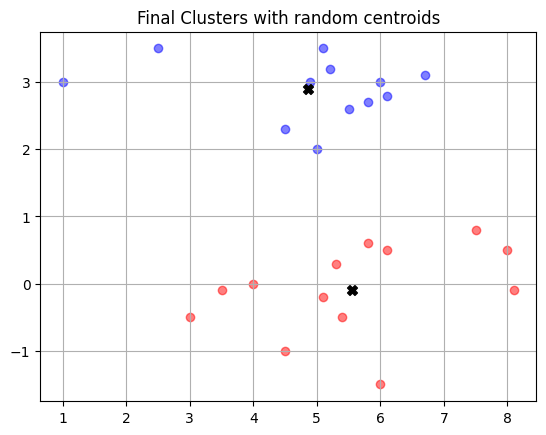

In [6]:
centroids_random, clusters_random = kmeans(X=X, k=k, iter=100, conv_thrsh=1e-4)
wcss=0
for i, point in enumerate(X):
     wcss += dist_fn(point, centroids_random[clusters_random[i]]) ** 2
print('WCSS with random centroids', wcss)

plot_clusters(X, clusters, centroids, "Final Clusters with initialzed centroids")
plot_clusters(X, clusters_random, centroids_random, "Final Clusters with random centroids")

# 4) Determining optimal number of clusters

reached convergence threshold, early stopping at iteration 2
reached convergence threshold, early stopping at iteration 2
reached convergence threshold, early stopping at iteration 2
reached convergence threshold, early stopping at iteration 4
reached convergence threshold, early stopping at iteration 4
reached convergence threshold, early stopping at iteration 4
reached convergence threshold, early stopping at iteration 7
reached convergence threshold, early stopping at iteration 3
reached convergence threshold, early stopping at iteration 2


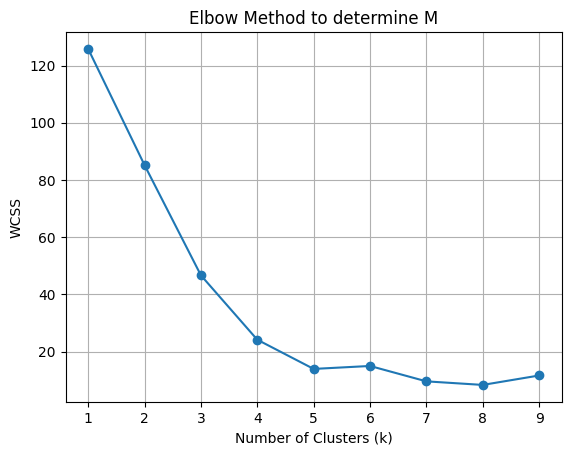

In [24]:
def calculate_wcss(X, k):
    centroids, clusters = kmeans(X, k)
    wcss = 0
    for i, point in enumerate(X):
        wcss += dist_fn(point, centroids[clusters[i]]) ** 2
    return wcss

#test different numbers of clusters
wcss_values = []
k_values = range(1, 10)
for k in k_values:
    wcss_values.append(calculate_wcss(X, k))

plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to determine M')
plt.grid(True)
plt.show()

reached convergence threshold, early stopping at iteration 6
WCSS with M clusters 22.632238095238097


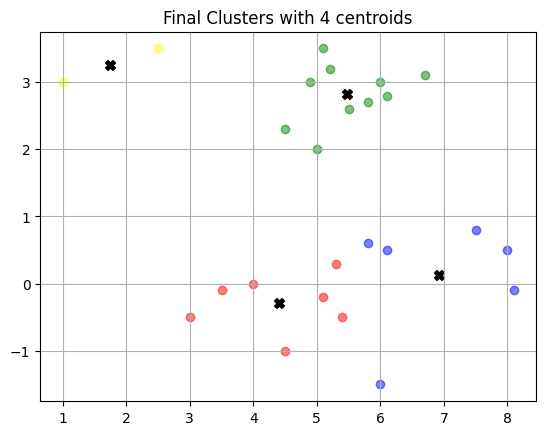

In [13]:
centroids_M, clusters_M = kmeans(X=X, k=4, iter=100, conv_thrsh=1e-4)
wcss=0
for i, point in enumerate(X):
     wcss += dist_fn(point, centroids_M[clusters_M[i]]) ** 2
print('WCSS with M clusters', wcss)
plot_clusters(X, clusters_M, centroids_M, "Final Clusters with 4 centroids")